# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [1]:
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
Warning message:
“package ‘stringr’ was built under R version 4.2.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
global_fishing = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-12/capture-fisheries-vs-aquaculture.csv",
                         col_types = cols()
                         )
global_fishing |> head()

Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1969,60,400
Afghanistan,AFG,1970,60,400
Afghanistan,AFG,1971,60,500
Afghanistan,AFG,1972,60,500
Afghanistan,AFG,1973,60,500
Afghanistan,AFG,1974,60,500


- First, I want to see how fish production has changed through the years in the **United States** and compare the differences between aquaculture and capture fisheries. I used lines to show the **average production** of aquaculture and capture fisherie.

In [3]:
fish = global_fishing |> 
        pivot_longer(cols = c(`Aquaculture production (metric tons)`, `Capture fisheries production (metric tons)`)) |> 
        filter(Entity == 'United States')

fish |> head()

Entity,Code,Year,name,value
<chr>,<chr>,<dbl>,<chr>,<dbl>
United States,USA,1960,Aquaculture production (metric tons),104421
United States,USA,1960,Capture fisheries production (metric tons),2755715
United States,USA,1961,Aquaculture production (metric tons),102547
United States,USA,1961,Capture fisheries production (metric tons),2979093
United States,USA,1962,Aquaculture production (metric tons),109961
United States,USA,1962,Capture fisheries production (metric tons),2995674


In [4]:
highest = fish |> group_by(name) |>
        summarize(average_value = mean(value)) 
highest

name,average_value
<chr>,<dbl>
Aquaculture production (metric tons),323932
Capture fisheries production (metric tons),4381083


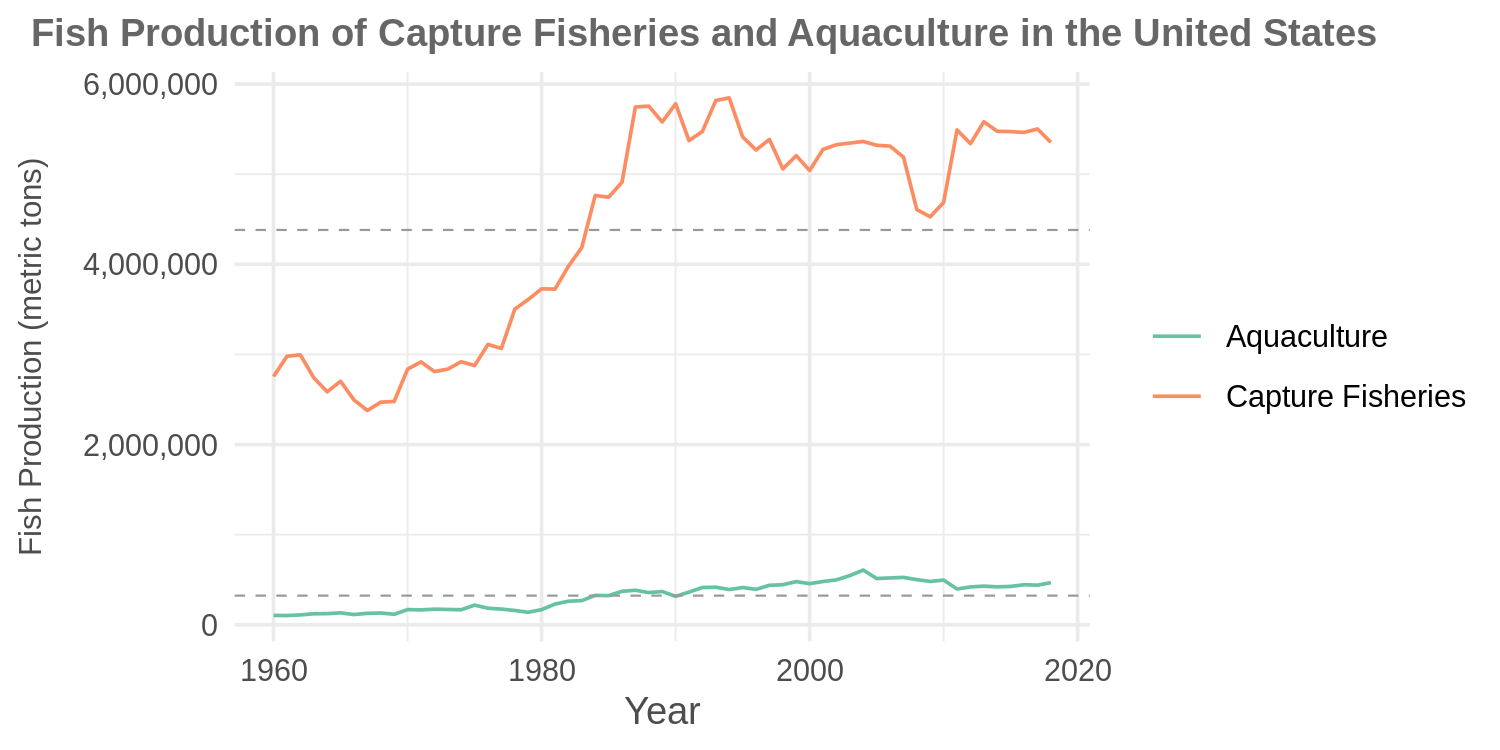

In [5]:
options(repr.plot.res = 250, repr.plot.height = 3, repr.plot.width = 6)

p = ggplot(fish, aes(x = Year, y = value, color = name))

p = p + geom_line() +
        labs(y = "Fish Production (metric tons)",  
            title = "Fish Production of Capture Fisheries and Aquaculture in the United States") + 
        theme_minimal() +
        scale_color_brewer(palette = 'Set2', labels = c("Aquaculture", "Capture Fisheries")) +
        scale_y_continuous(labels = scales::comma) +
        theme(plot.title = element_text(size = 11, hjust = 0.1, color = "grey40", face = "bold"), 
              plot.title.position = "plot",
              legend.title = element_blank(),
             axis.title.x = element_text(color = "grey30"),axis.title.y = element_text(color = "grey30", size = 9,, margin = margin(r = 10)))

p = p + geom_hline(data = highest, aes(yintercept = average_value), color = "grey60", linetype = "dashed", linewidth = 0.3) 
 
p

- I have learned from the tidytuesday links that many Asian countries may have a very high level of fish production through **capture fisheries**. I want to select some **Asian countries** and compare their **average amount of production** with that of the **United States**. Also, to better identify the reliability of the calculated average data, **error bars** are included in that bar chart.


In [6]:
fish2 = global_fishing |> 
            filter(Entity %in% c('United States', 'China', 'Japan', 'Indonesia', 'Thailand')) |>
            filter(`Capture fisheries production (metric tons)` != "NA") |>
            filter (Year > 2000) |> 
            group_by(Entity) |> 
            summarize(meanfish = mean(`Capture fisheries production (metric tons)`), 
                                                                  sdfish = sd(`Capture fisheries production (metric tons)`)) |>
            arrange(desc(meanfish))
            

fish2

Entity,meanfish,sdfish
<chr>,<dbl>,<dbl>
China,15228115,625562.8
Indonesia,5564915,926272.6
United States,5257419,315236.0
Japan,4073101,533232.4
Thailand,2138977,534837.3


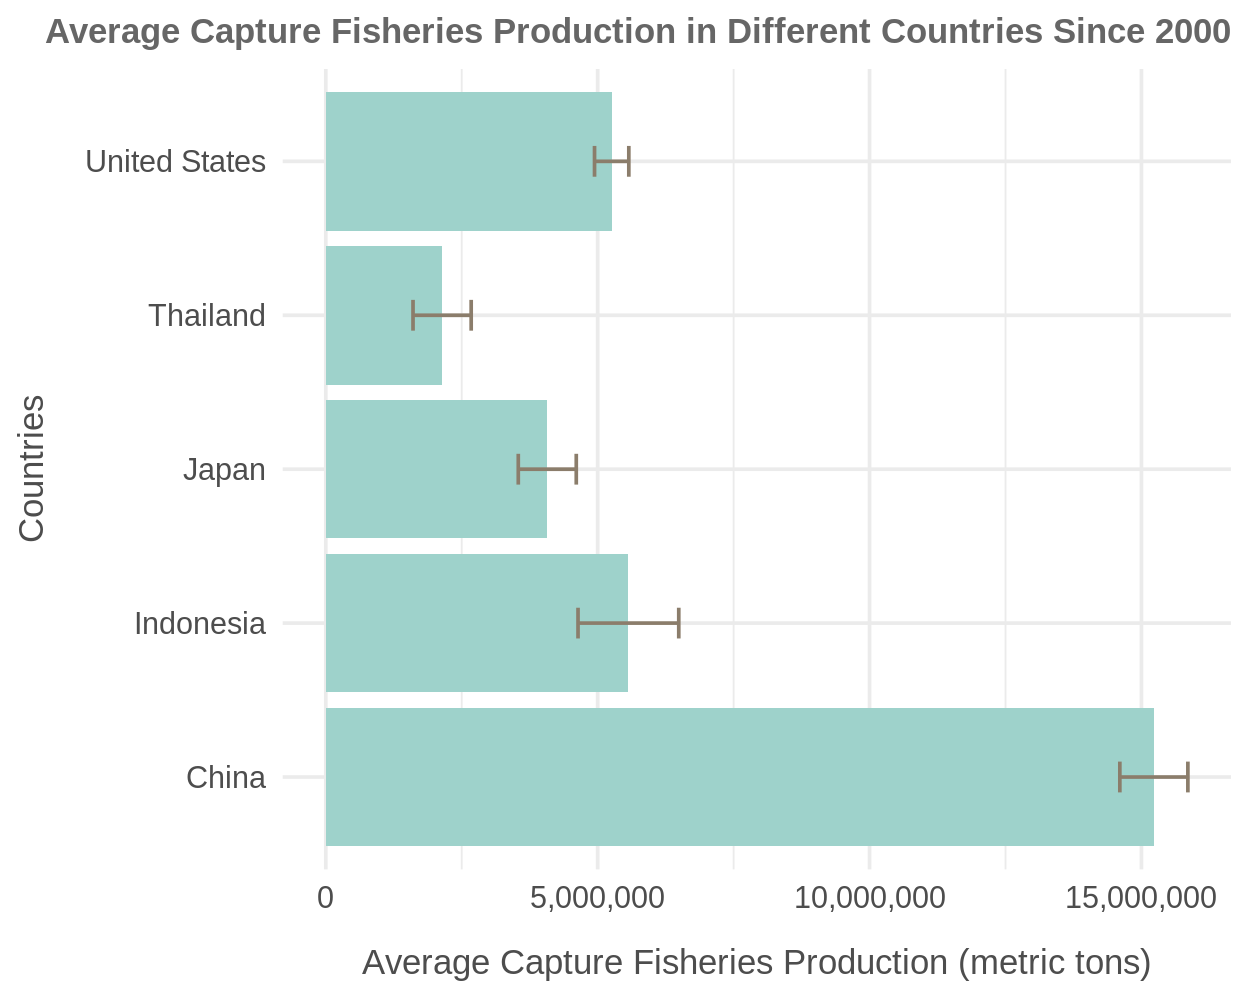

In [7]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 5)
p2 = ggplot(fish2, aes(x = Entity))

p2 = p2 + geom_bar(aes(y = meanfish), stat = 'identity', fill="#9ED2CB") +
          geom_errorbar(aes(ymin = meanfish - sdfish, ymax = meanfish + sdfish), color = 'bisque4',width = 0.2, linewidth = 0.5) +
          labs(y = "Average Capture Fisheries Production (metric tons)",  x = "Countries",
          title = "Average Capture Fisheries Production in Different Countries Since 2000") + 
          theme_minimal() +
          scale_y_continuous(labels = scales::comma) + 
          theme(plot.title = element_text(size = 10, hjust = 1, color = "grey40", face = "bold"), 
              plot.title.position = "plot",
              legend.title = element_blank(),
              axis.title.x = element_text(color = "grey30", size = 10, margin = margin(t = 10)),
              axis.title.y = element_text(color = "grey30", size = 10,, margin = margin(r = 10))) +
          coord_flip()

p2

- There may be some **correlations** between aquaculture production and capture fisheries production. I am mainly interested in the correlation within the **United States** and chose **Thailand** as a comparison group to see whether there is a similar pattern. I did not include other asian countries in the bar chart because, in those countries, aquaculture production is way higher than in the United States, and we cannot see the data points clearly if we make a scatter plot that way. 

In [8]:
fish3 = global_fishing |> filter(Entity %in% c('United States', 'Thailand'))

fish3 |> head()

Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons)
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Thailand,THA,1960,31545,199875
Thailand,THA,1961,41436,274904
Thailand,THA,1962,41893,309267
Thailand,THA,1963,39525,391380
Thailand,THA,1964,40474,549576
Thailand,THA,1965,42112,587753


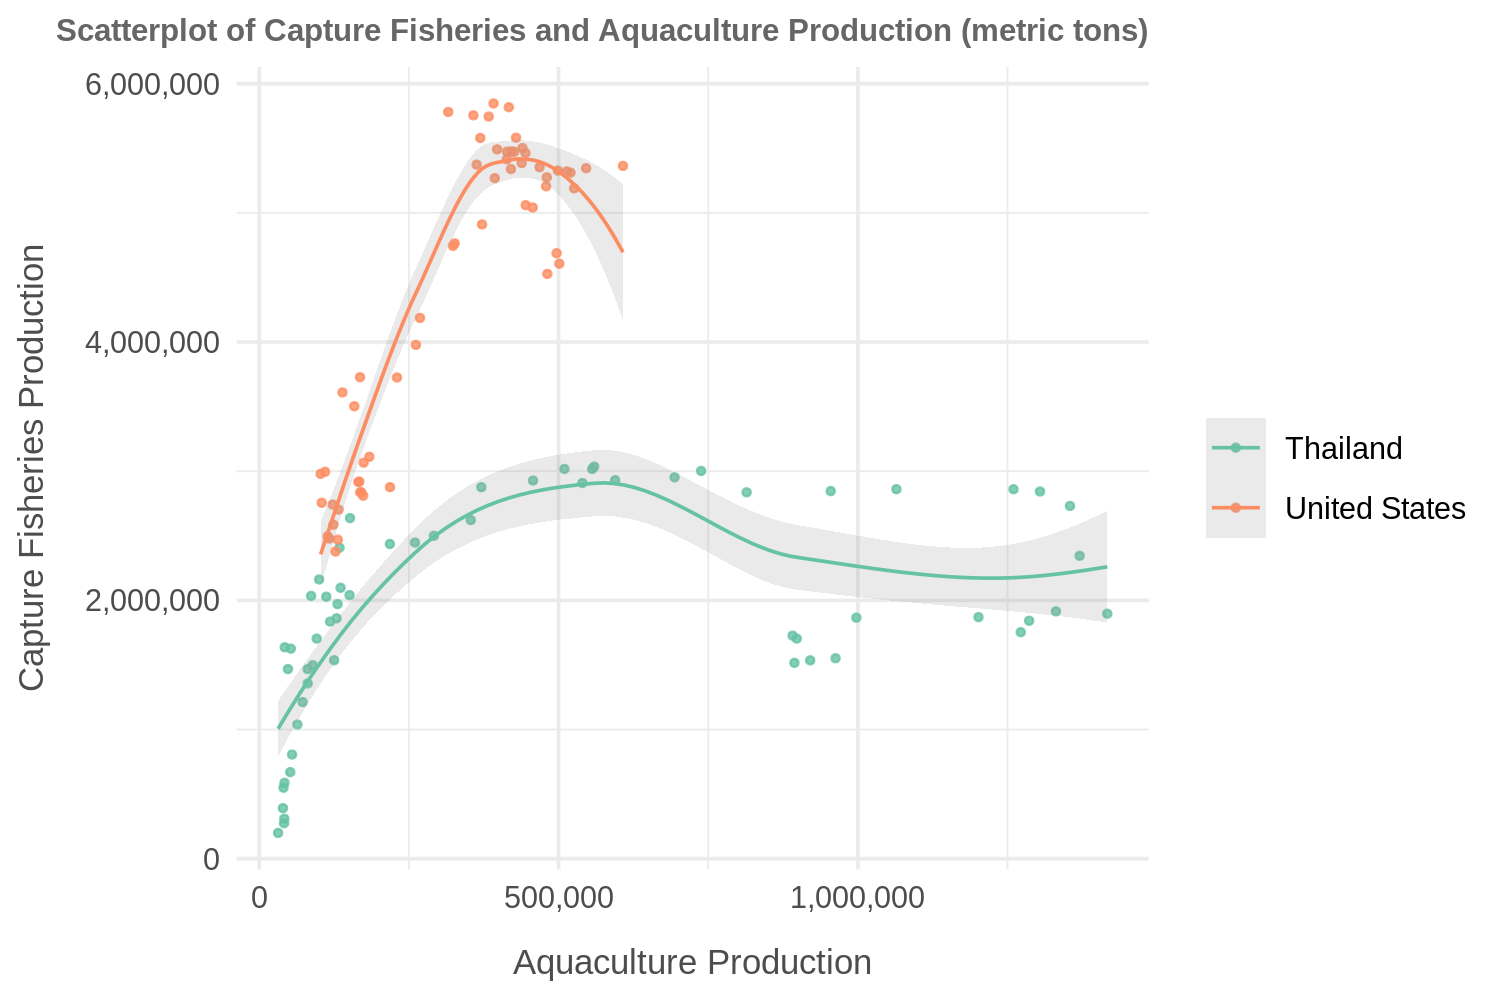

In [9]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 6)
p3 = ggplot(fish3, aes(x = `Aquaculture production (metric tons)`, y = `Capture fisheries production (metric tons)`, color = Entity))

p3 = p3 + geom_point(size = 0.75, alpha = 0.8) +
        labs(y = "Capture Fisheries Production",  x = "Aquaculture Production",
            title = "Scatterplot of Capture Fisheries and Aquaculture Production (metric tons)") + 
        theme_minimal() +
        scale_color_brewer(palette = 'Set2') +
        scale_y_continuous(labels = scales::comma) +
        scale_x_continuous(labels = scales::comma) +
        theme(plot.title = element_text(size = 9, hjust = 0.1, color = "grey40", face = "bold"), 
              plot.title.position = "plot",
              legend.title = element_blank(),
              axis.title.x = element_text(color = "grey30", size = 10, margin = margin(t = 10)),
              axis.title.y = element_text(color = "grey30", size = 10,, margin = margin(r = 10)))

p3 = p3 + geom_smooth(method = 'loess', formula = 'y ~ x', stat = "smooth", position = "identity",alpha = 0.2, span = 1, linewidth = 0.5)

p3